In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# for statistical data visualization
import seaborn as sns 

In [2]:
# getting column names from the dataset source
columns = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis", "class"]

# read the data from the file
vertebral_data = pd.read_csv("./ClassificationLab/Data/vertebral_column_data.txt", names = columns, sep = " ")
vertebral_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [3]:
# EDA
##################################
# Numerical analysis of the dataset
print("Shape of the dataset : ", vertebral_data.shape)
print("-----------------------------------------------------------------------------------------------------")
print("Count of null values in each column :\n")
print(vertebral_data.isna().sum())
print("-----------------------------------------------------------------------------------------------------")
print("Column datatypes for dataset: \n")
print(vertebral_data.dtypes)
print("-----------------------------------------------------------------------------------------------------")
print("Summary statistics for dataset: \n")
vertebral_data.describe()

Shape of the dataset :  (310, 7)
-----------------------------------------------------------------------------------------------------
Count of null values in each column :

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
-----------------------------------------------------------------------------------------------------
Column datatypes for dataset: 

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object
-----------------------------------------------------------------------------------------------------
Summary statistics for dataset: 



,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000



Histogram plots for the features:



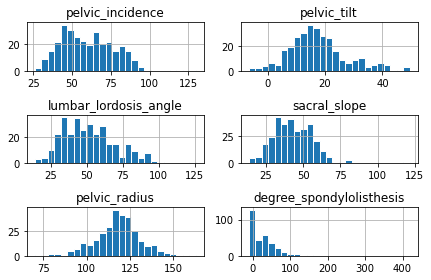


Pair plot for the features:



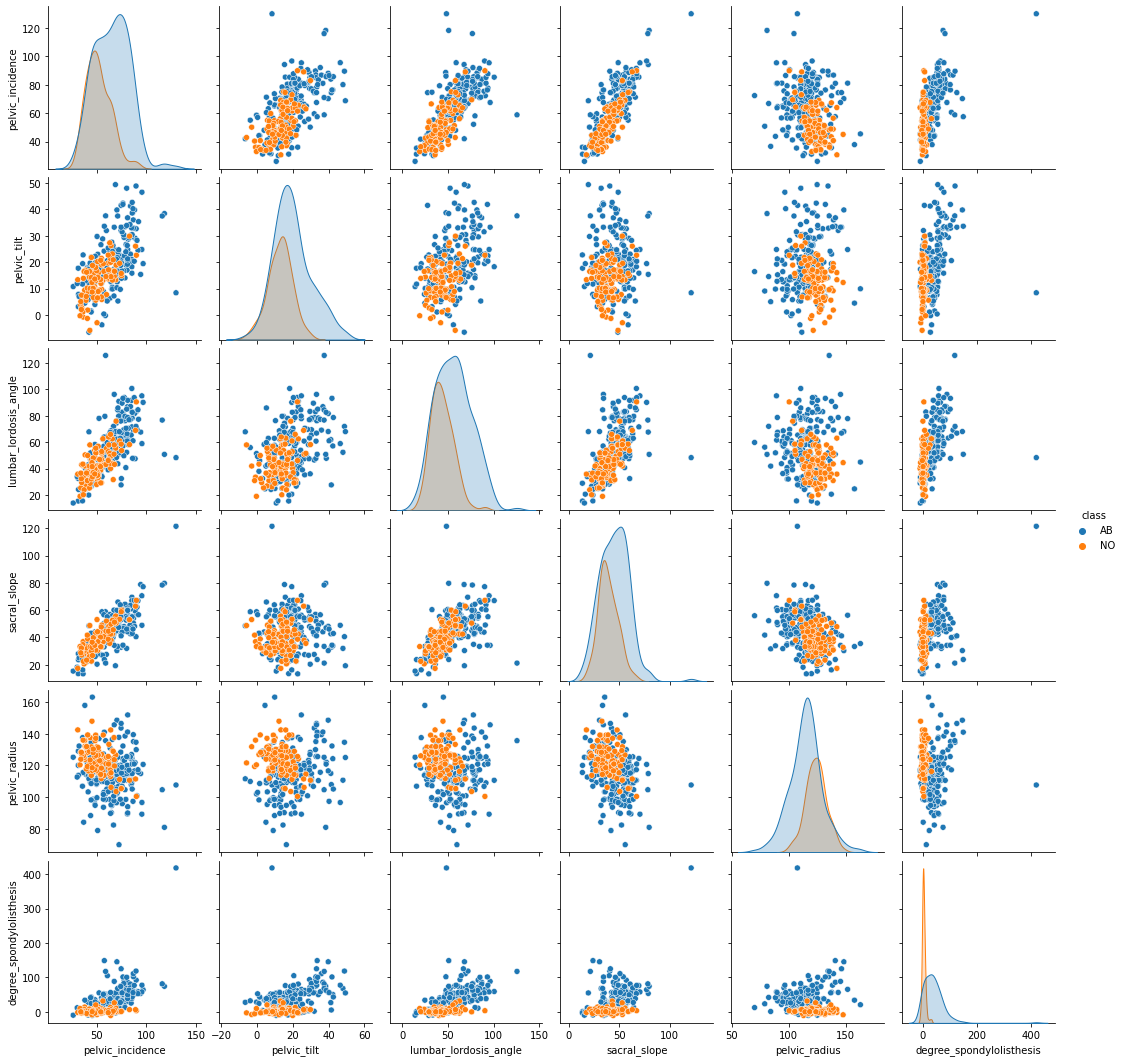


Heat map for correlation between the features:



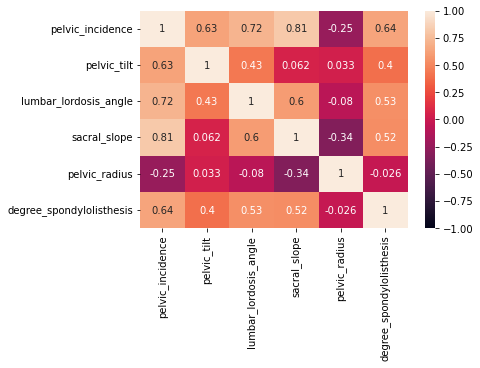

In [4]:
# 1) Univariate Analysis
# histogram plot for feature data
print("\nHistogram plots for the features:\n")
ax = vertebral_data.hist(bins = 25, ec="white")
plt.tight_layout()
plt.savefig('./FiguresCW2/Histogram plot.png',format='png')
plt.show()

# 2) Bivariate Analysis
# pair plot for the features, to see if they have correlations and how they affect each other
print("\nPair plot for the features:\n")
sns.pairplot(vertebral_data, hue="class")
plt.savefig('./FiguresCW2/Pair plot 1.png',format='png')
plt.show()

# 3) Multivariate Analysis
# heat map to visualize correlation matrix for the features
print("\nHeat map for correlation between the features:\n")
sns.heatmap(vertebral_data.corr(), vmax=1, vmin=-1, annot=True)
plt.savefig('./FiguresCW2/Heat map.png',format='png')
plt.show()

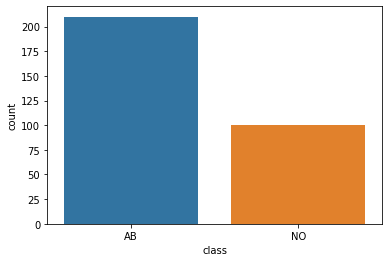

In [5]:
# count of data belonging to both the classes
vertebral_data.loc[:,'class'].value_counts()
sns.countplot(x="class", data=vertebral_data)
plt.savefig('./FiguresCW2/Class distribution.png',format='png')
plt.show()

In [26]:
class_labels.value_counts()

AB    210
NO    100
Name: class, dtype: int64

In [6]:
# separating the labels from the features
class_labels = vertebral_data["class"]
vertebral_data.drop("class", inplace = True, axis = 1)
vertebral_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,-0.25
1,39.06,10.06,25.02,29.00,114.41,4.56
2,68.83,22.22,50.09,46.61,105.99,-3.53
3,69.30,24.65,44.31,44.64,101.87,11.21
4,49.71,9.65,28.32,40.06,108.17,7.92
...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25
306,53.94,20.72,29.22,33.22,114.37,-0.42
307,61.45,22.69,46.17,38.75,125.67,-2.71
308,45.25,8.69,41.58,36.56,118.55,0.21


In [7]:
# import scaler from sklearn 
from sklearn.preprocessing import StandardScaler

# Feature scaling
# normalize the dependent variables, so that they are in a particular range using standard scaler
stdScaler = StandardScaler()
vertebral_data_scaled = stdScaler.fit_transform(vertebral_data)

# creating a dataframe for the scaled features
scaled_features_df = pd.DataFrame(vertebral_data_scaled, index=vertebral_data.index, columns=vertebral_data.columns)
scaled_features_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147227,0.501111,-0.665128,-0.184602,-1.447831,-0.707946
1,-1.245707,-0.748891,-1.452763,-1.041250,-0.264028,-0.579673
2,0.484273,0.468085,-0.099370,0.272823,-0.897295,-0.795417
3,0.511586,0.711280,-0.411401,0.125820,-1.207159,-0.402332
4,-0.626819,-0.789923,-1.274614,-0.215943,-0.733337,-0.490069
...,...,...,...,...,...,...
305,-0.732001,-0.392605,-0.860012,-0.646505,-0.035390,-0.814618
306,-0.381007,0.317965,-1.226028,-0.726350,-0.267036,-0.712480
307,0.055410,0.515123,-0.310989,-0.313696,0.582835,-0.773549
308,-0.885997,-0.886000,-0.558778,-0.477116,0.047341,-0.695679


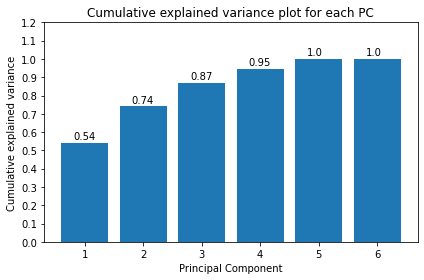

In [8]:
# PRINCIPAL COMPONENT ANALYSIS (PCA)

# import PCA
from sklearn.decomposition import PCA

# create PCA instance, fit and transform the standardized data with pca
pca = PCA()
pc = pca.fit_transform(scaled_features_df)

# calculate the cumulative sum of the explained variance ratio for each principal component
cum_var_exp = pca.explained_variance_ratio_.cumsum()

# plot the bargraph for cumulative explained variance for each principal component
PC_values = np.arange(pca.n_components_) + 1
bars = plt.bar(PC_values, cum_var_exp)
# access the bar attributes to place the text values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + .2, yval + .02, round(yval,2)) 
    
plt.title('Cumulative explained variance plot for each PC')
plt.ylabel('Cumulative explained variance')
plt.xlabel('Principal Component')
plt.yticks(np.arange(0, 1.3, step=0.1)) 
plt.tight_layout()
plt.savefig('./FiguresCW2/PCA variance plot.png',format='png')
plt.show()

C:\Users\Ananya\AppData\Local\Temp/ipykernel_16812/2379330790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pca["labels"] = class_labels


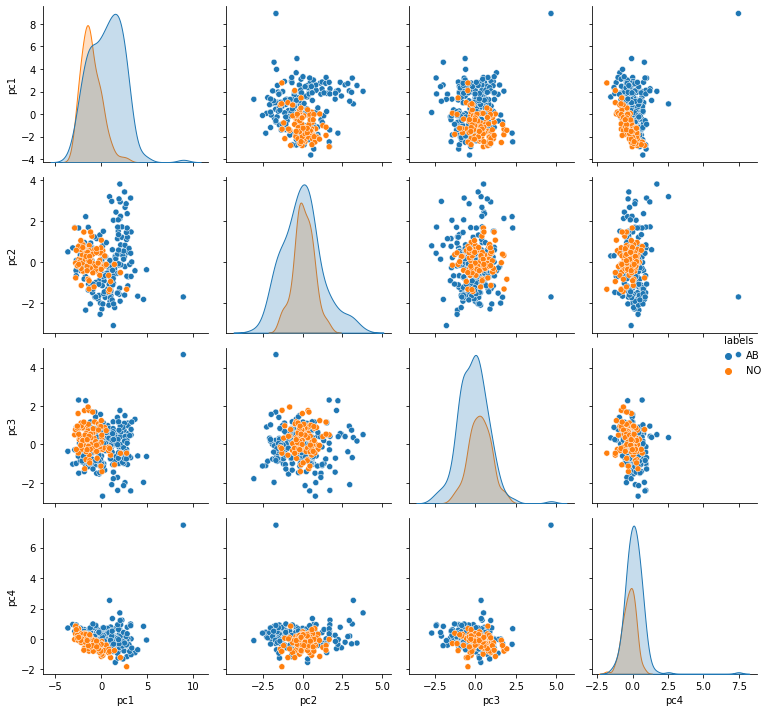

In [9]:
# change to dataframes first
vertebral_data_scaled_pca = pd.DataFrame(pc, columns = ['pc1','pc2','pc3', 'pc4', 'pc5', 'pc6'])

X_pca = vertebral_data_scaled_pca[['pc1','pc2','pc3', 'pc4']]
X_pca["labels"] = class_labels

# Scatter plot for the 3 top Principal components with actual labels
sns.pairplot(X_pca, hue="labels")
plt.savefig('./FiguresCW2/Pair plot PCA.png',format='png')
plt.tight_layout()
plt.show()

# Kmeans

C:\Users\Ananya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


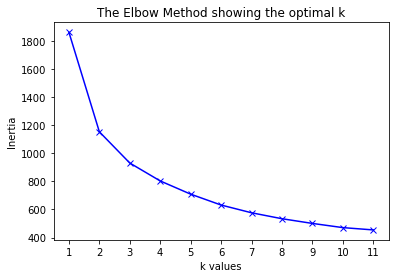

In [10]:
# Unsupervised clustering - K-Means
###########################################

# finding optimal k value using Elbow method
from sklearn.cluster import KMeans

inertias = []
K = range(1,12)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(scaled_features_df)
    inertias.append(kmean.inertia_) 
    
plt.plot(K, inertias, 'bx-')
plt.xlabel('k values')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(np.arange(1,12))
plt.savefig('./FiguresCW2/Elbow method.png',format='png')
plt.show()

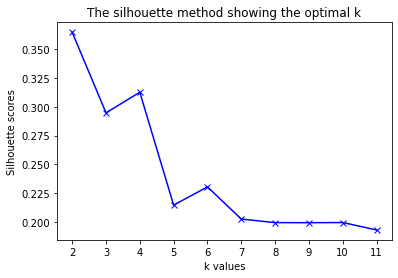

In [11]:
# finding optimal k value using Silhouette method
from sklearn.metrics import silhouette_samples, silhouette_score

# The Silhouette Score reaches its global maximum at the optimal k
# Therefore a high Silhouette Score is desirable
silhouettes = []
K = range(2,12)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(scaled_features_df)
    silhouettes.append(silhouette_score(scaled_features_df, kmean.labels_, metric = 'euclidean'))
    
plt.plot(K, silhouettes, 'bx-')  
plt.xlabel('k values')
plt.ylabel('Silhouette scores')
plt.title('The silhouette method showing the optimal k')
plt.xticks(np.arange(2,12))
plt.savefig('./FiguresCW2/Silhouette Method.png',format='png')
plt.show()

# selected optimal k value as 2, because that is the global maxima in the graph

In [12]:
# create the kmeans clustering model
kmeans = KMeans(n_clusters = 2, random_state = 0)
# fit the data to the model
y_kmeans = kmeans.fit_predict(scaled_features_df)
# calculate the cluster centers for the data
clusters = kmeans.cluster_centers_
# calculate the inertia for the data
inertia = kmeans.inertia_
print("The kmeans cluster centers are = \n", clusters)
print("The kmeans inertia = ", inertia)

# evaluate and store the labels generated by the model
labels = kmeans.labels_
# changing predicted labels to the actual classes 
mapping = {0:'AB', 1:'NO'}
y_pred = [mapping[i] for i in labels]
# calculating number of cluster labels that match the actual class labels
correct_labels = sum(class_labels == y_pred)
print("-----------------------------------------------------")
print("\nResult: %d out of %d samples were correctly labeled" % (correct_labels, class_labels.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(class_labels.size)))

The kmeans cluster centers are = 
 [[ 0.97012742  0.60976985  0.88853035  0.79105929 -0.27089815  0.73078755]
 [-0.66432638 -0.41755979 -0.60845013 -0.54170364  0.18550634 -0.5004306 ]]
The kmeans inertia =  1151.8966087304477
-----------------------------------------------------

Result: 206 out of 310 samples were correctly labeled
Accuracy score: 0.66


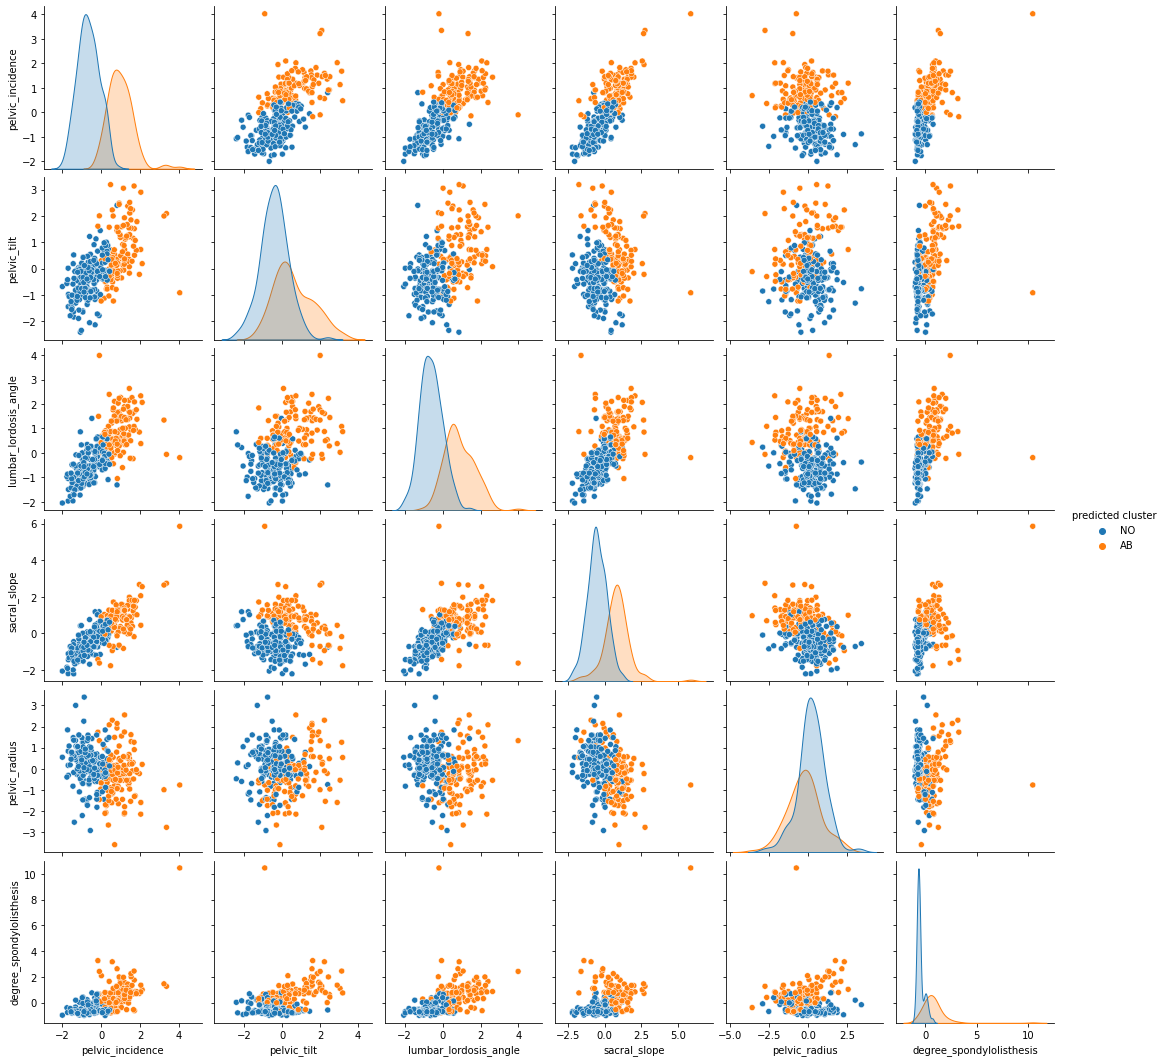

In [13]:
# craeting a new dataframe with the scaled features and the predicted clusters
X_Kmeans = scaled_features_df.copy()
X_Kmeans["predicted cluster"] = y_pred

# plotting the scatter plot for the predicted clusters
sns.pairplot(X_Kmeans, hue="predicted cluster")
plt.savefig('./FiguresCW2/Pair plot Kmeans.png',format='png')
plt.show()

In [14]:
# importing the sklearn libraries for creating the confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Confusion matrix for K-Means clustering
kmeans_conf_matrix = confusion_matrix(class_labels, y_pred)
kmeans_report = classification_report(class_labels, y_pred)
print("Confusion matrix for K-Means :")
print(kmeans_conf_matrix)
print("------------------------------------------------------")
print("\nClassification Report for K-Means:")
print(kmeans_report)

Confusion matrix for K-Means :
[[116  94]
 [ 10  90]]
------------------------------------------------------

Classification Report for K-Means:
              precision    recall  f1-score   support

          AB       0.92      0.55      0.69       210
          NO       0.49      0.90      0.63       100

    accuracy                           0.66       310
   macro avg       0.70      0.73      0.66       310
weighted avg       0.78      0.66      0.67       310



In [15]:
# Kmeans using the data from PCA

# create the kmeans clustering model
kmeans = KMeans(n_clusters = 2, random_state = 0)
# fit the data to the model
y_kmeans = kmeans.fit_predict(X_pca.drop("labels", axis=1))
# calculate the cluster centers for the data
clusters = kmeans.cluster_centers_
# calculate the inertia for the data
inertia = kmeans.inertia_
print("The kmeans cluster centers are = \n", clusters)
print("The kmeans inertia = ", inertia)

# evaluate and store the labels generated by the model
labels = kmeans.labels_
mapping = {0:'AB', 1:'NO'}
y_pred = [mapping[i] for i in labels]
# checking the number of cluster labels predicted that match the actual classes
correct_labels = sum(class_labels == y_pred)
print("------------------------------------------------------")
print("\nResult: %d out of %d samples were correctly labeled" % (correct_labels, class_labels.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(class_labels.size)))

The kmeans cluster centers are = 
 [[ 1.82483609  0.01053572 -0.02893855 -0.0583396 ]
 [-1.24961602 -0.00721468  0.01981662  0.03994994]]
The kmeans inertia =  1051.105553459721
------------------------------------------------------

Result: 206 out of 310 samples were correctly labeled
Accuracy score: 0.66


C:\Users\Ananya\AppData\Local\Temp/ipykernel_16812/1831341123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Kmeans_pca["predicted clusters"] = y_pred


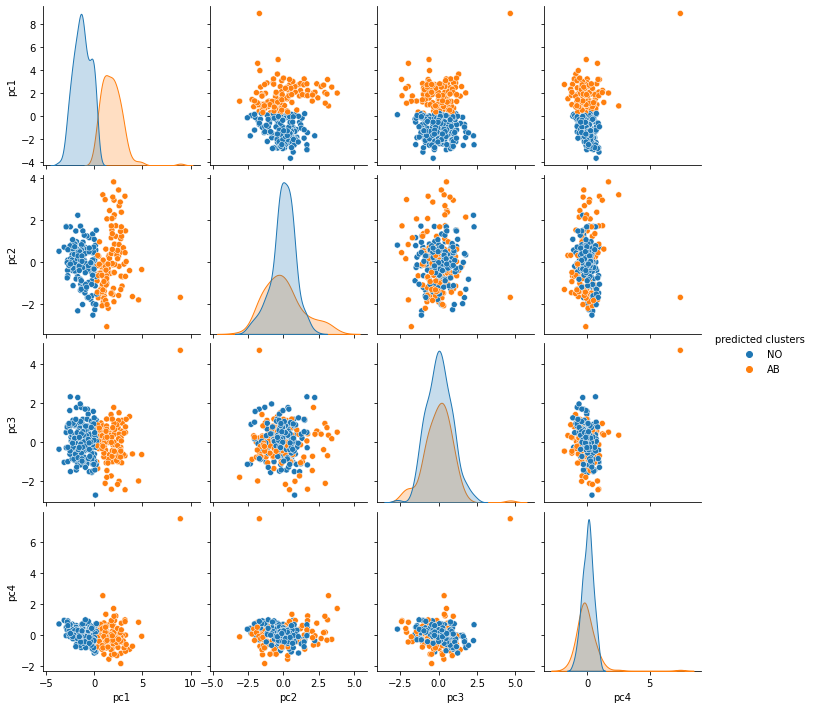

In [16]:
# plotting the scatter plots for the predicted clusters after PCA/K-Means
X_Kmeans_pca = vertebral_data_scaled_pca[ ['pc1','pc2','pc3', 'pc4']]
X_Kmeans_pca["predicted clusters"] = y_pred

sns.pairplot(X_Kmeans_pca, hue="predicted clusters")
plt.savefig('./FiguresCW2/Pair plot KMeans PCA.png',format='png')
plt.show()

# Decision Tree

In [21]:
# Supervised Clustering - Decision Tree
##########################################################

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# building a decision tree classifier model
classifier = DecisionTreeClassifier(random_state=0, criterion="entropy")
# create a 80/20 train test split
x_train, x_test, y_train, y_test = train_test_split(scaled_features_df, class_labels, test_size = 0.20, random_state = 0)
# training the classifier
classifier.fit(x_train, y_train) 
# making predictions
y_pred = classifier.predict(x_test) 

# Summary of the predictions made by the classifier
print("The classification report for Decision Tree :")
print(classification_report(y_test, y_pred)) 
print("------------------------------------------------------")
# evaluate the quality of the predictions
print("\nThe confusion matrix for Decision Tree :")
print(confusion_matrix(y_test, y_pred)) 
print("------------------------------------------------------")
# Accuracy score for the classifier model
print('\nThe accuracy for  Decision Tree is', accuracy_score(y_pred, y_test)) 

The classification report for Decision Tree :
              precision    recall  f1-score   support

          AB       0.90      0.81      0.85        43
          NO       0.65      0.79      0.71        19

    accuracy                           0.81        62
   macro avg       0.77      0.80      0.78        62
weighted avg       0.82      0.81      0.81        62

------------------------------------------------------

The confusion matrix for Decision Tree :
[[35  8]
 [ 4 15]]
------------------------------------------------------

The accuracy for  Decision Tree is 0.8064516129032258


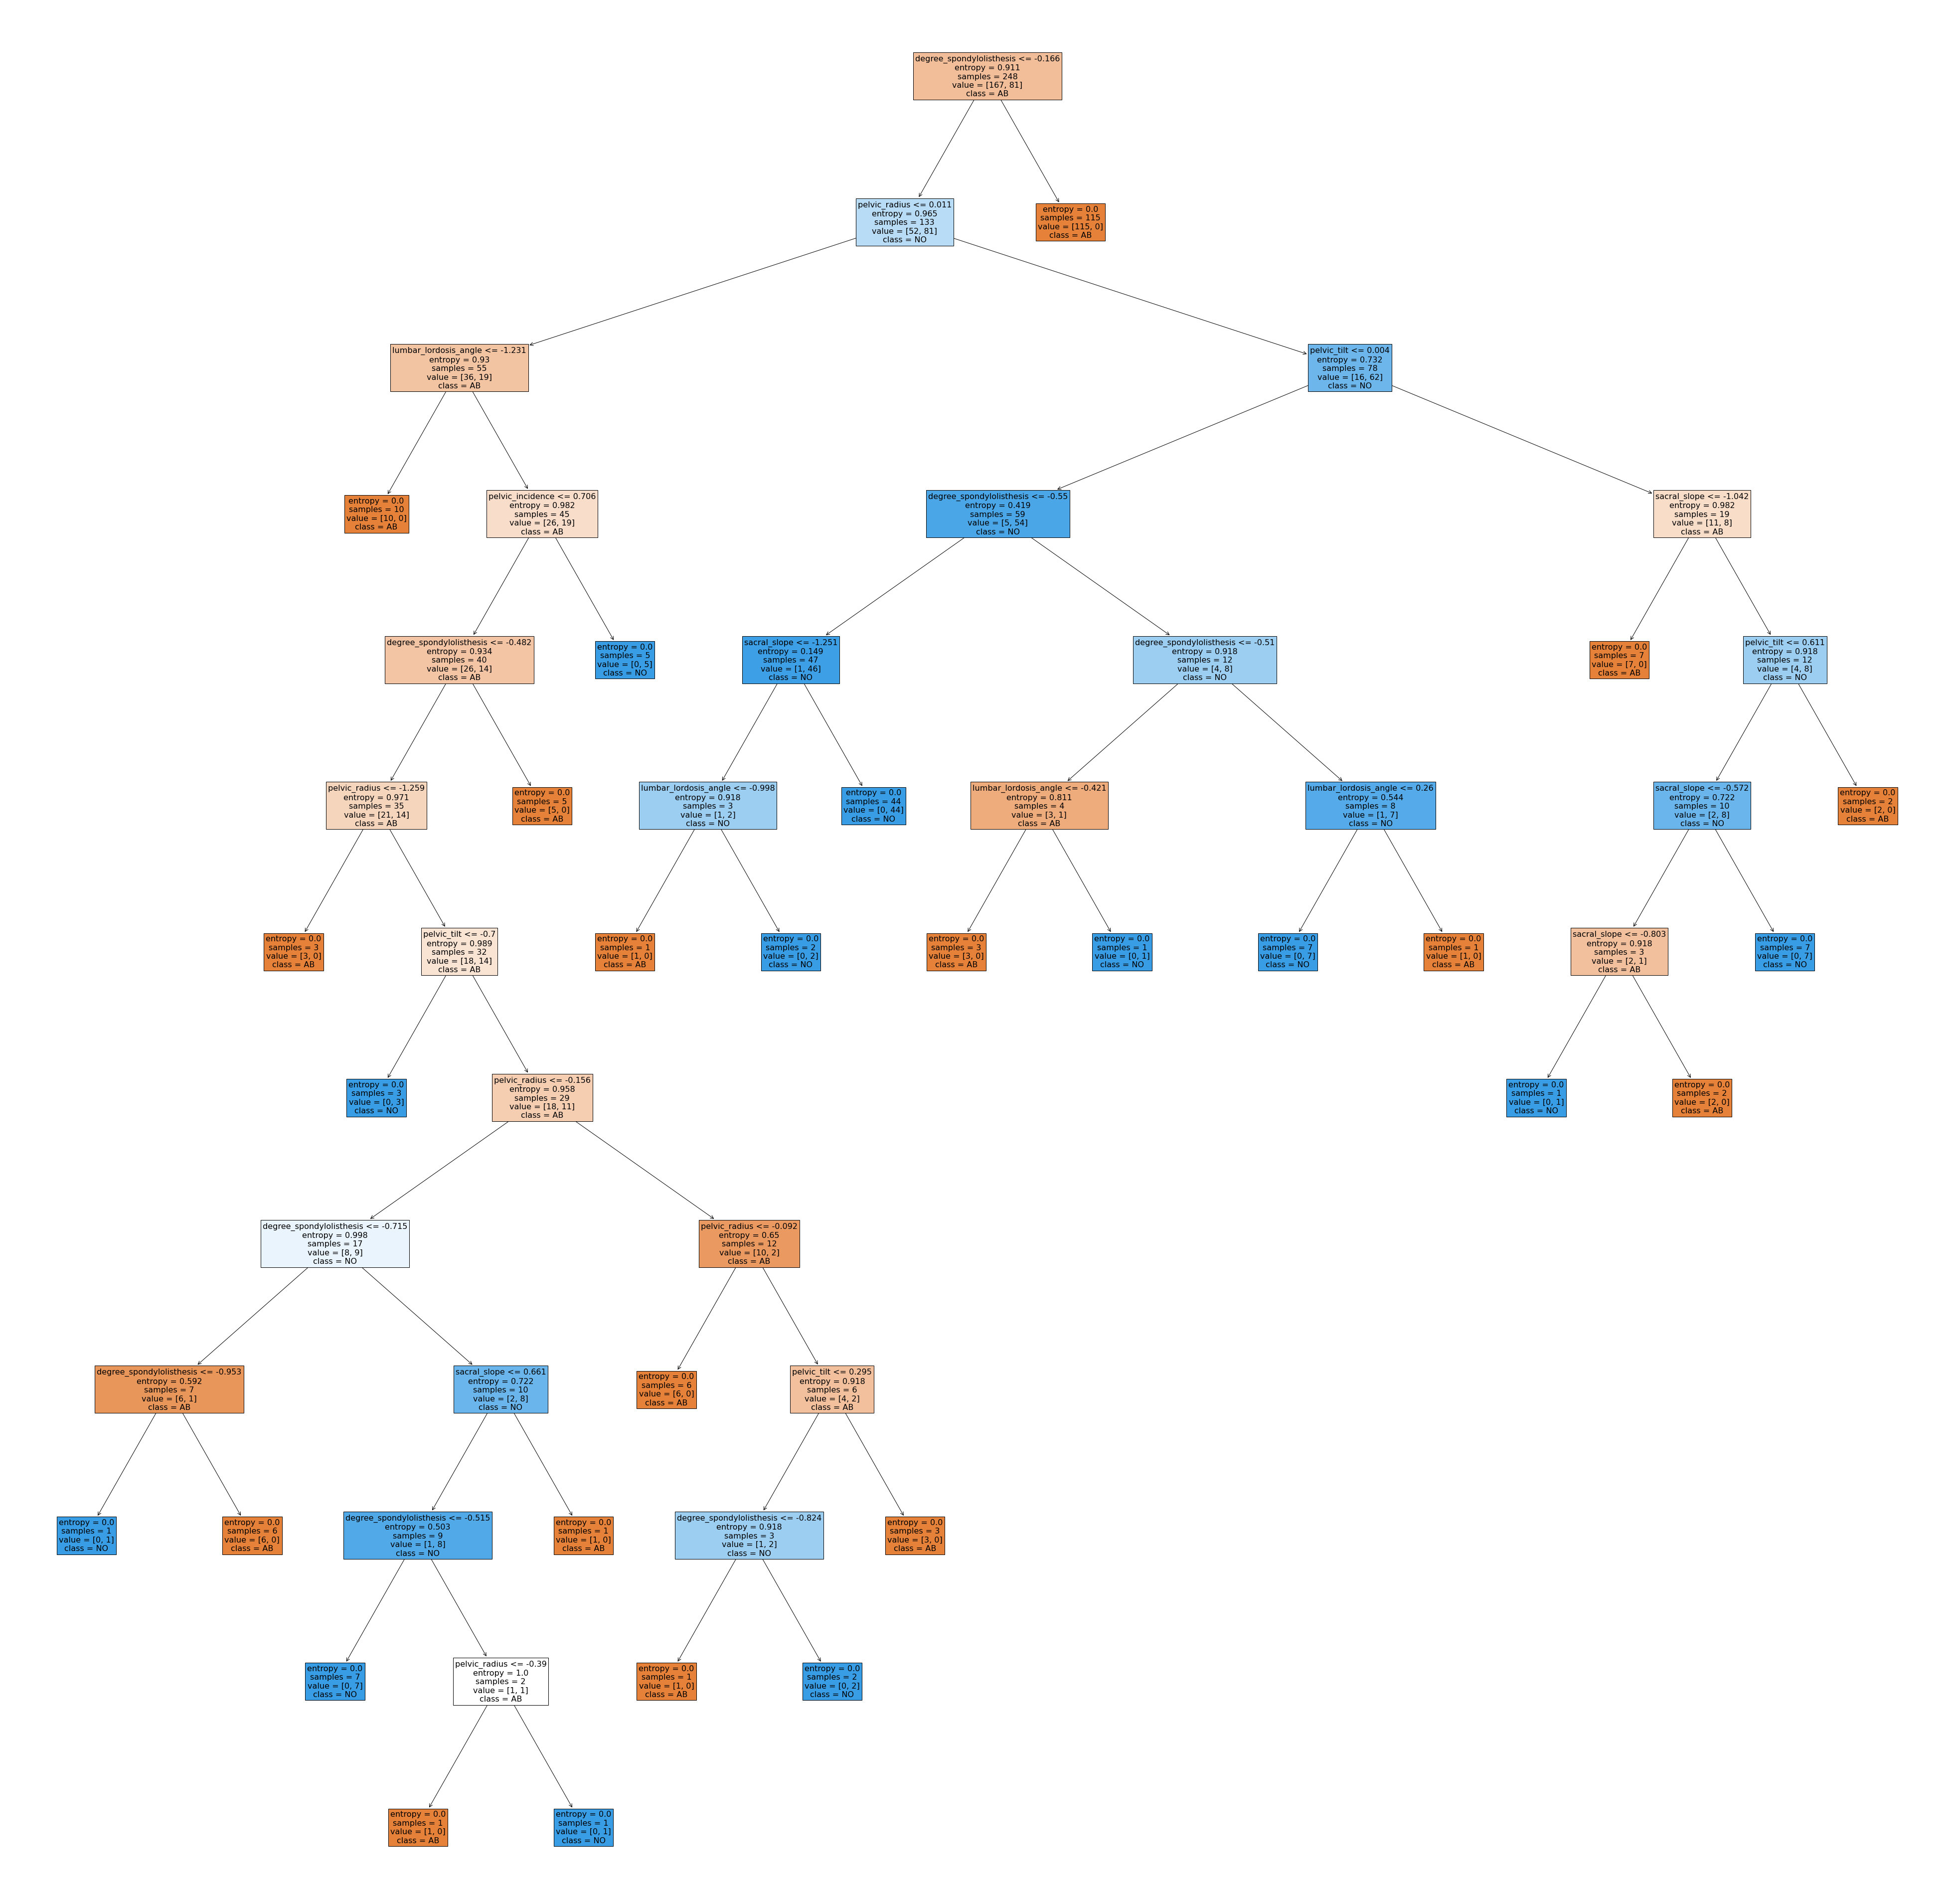

In [22]:
# plot the decision tree for visualization
plt.figure(figsize = (70,70))
plot_tree(classifier, filled = True, fontsize = 16, feature_names = vertebral_data.columns, class_names = ["AB", "NO"])
plt.savefig('./FiguresCW2/Decision Tree.png',format='png')
plt.show()

In [24]:
# Decision Tree classification using data from PCA

# building a decision tree classifier model
classifier = DecisionTreeClassifier(random_state=0, criterion="entropy")
# create a 80/20 train test split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(vertebral_data_scaled_pca, class_labels, test_size = 0.20, random_state = 0)
# training the classifier
classifier.fit(x_train_pca, y_train_pca) 
# making predictions
y_pred_pca = classifier.predict(x_test_pca) 

# Summary of the predictions made by the classifier
print("The classification report for Decision Tree with PCA:")
print(classification_report(y_test_pca, y_pred_pca)) 
print("------------------------------------------------------")
# evaluate the quality of the predictions
print("\nThe confusion matrix for Decision Tree with PCA :")
print(confusion_matrix(y_test_pca, y_pred_pca)) 
print("------------------------------------------------------")
# Accuracy score for the classifier model
print('\nThe accuracy for  Decision Tree with PCA is', accuracy_score(y_pred_pca, y_test_pca)) 

The classification report for Decision Tree with PCA:
              precision    recall  f1-score   support

          AB       0.83      0.81      0.82        43
          NO       0.60      0.63      0.62        19

    accuracy                           0.76        62
   macro avg       0.72      0.72      0.72        62
weighted avg       0.76      0.76      0.76        62

------------------------------------------------------

The confusion matrix for Decision Tree with PCA :
[[35  8]
 [ 7 12]]
------------------------------------------------------

The accuracy for  Decision Tree with PCA is 0.7580645161290323
